/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_26034/4190600147.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_26034/4190600147.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_26034/4190600147.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

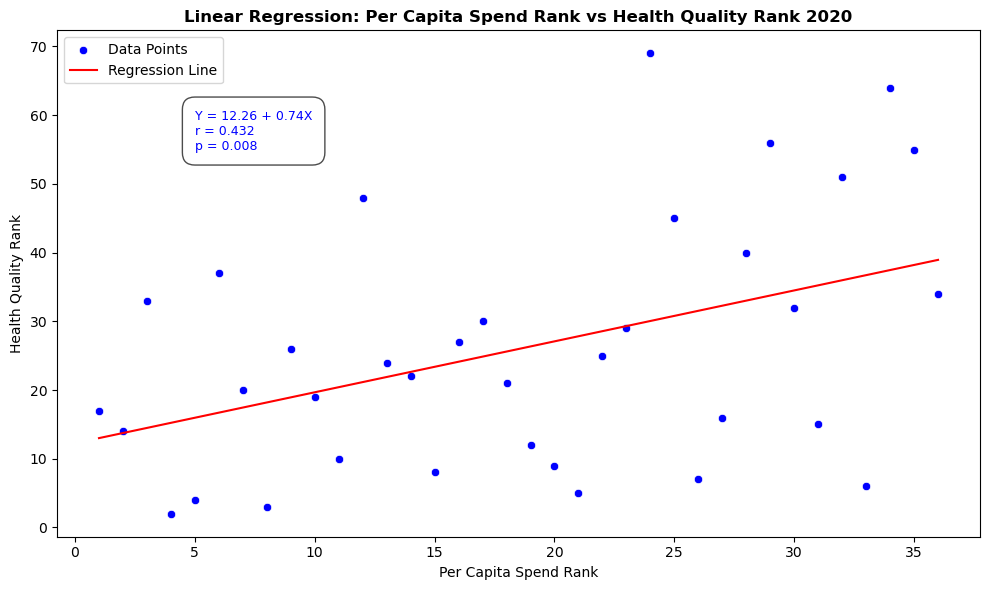

Correlation coefficient: 0.432
P-value: 0.008


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# Given data

### per_capita_spend_rank corresponds to the ranking of the USD_CAP in 2020 by country after exlusion of the above 4 outliers (USA, BGR, LTU, LVA)

### health_quality_rank corresponds to the Health Rank as published in the 2020 Legatum Prosperity Index 


per_capita_spend_rank = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36] # 2020 Per Capita Spend Rank
health_quality_rank = [17, 14, 33, 2, 4, 37, 20, 3, 26, 19, 10, 48, 24, 22, 8, 27, 30, 21, 12, 9, 5, 25, 29, 69, 45, 7, 16, 40, 56, 32, 15, 51, 6, 64, 55, 34] # 2020 Health Quality Rank based on Legatum P.I Report

# Create a DataFrame
df = pd.DataFrame({
    'Per Capita Spend Rank': per_capita_spend_rank,
    'Health Quality Rank': health_quality_rank
})

# Calculate the Pearson correlation coefficient
correlation_coef, _ = pearsonr(df['Per Capita Spend Rank'], df['Health Quality Rank'])

# Fit the linear regression model using OLS
X = sm.add_constant(df['Per Capita Spend Rank'])  # Add a constant for intercept
y = df['Health Quality Rank']
model = sm.OLS(y, X).fit()

# Get the intercept (a) and slope (b) from the model
intercept = model.params[0]
slope = model.params[1]
equation = f'Y = {intercept:.2f} + {slope:.2f}X'

# Get the p-value from the model
p_value = model.pvalues[1]

# Get the predicted values for the regression line
df['Predicted Health Quality Rank'] = model.predict(X)

# Plotting the scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Per Capita Spend Rank'], y=df['Health Quality Rank'], label='Data Points', color='blue')
plt.plot(df['Per Capita Spend Rank'], df['Predicted Health Quality Rank'], color='red', label='Regression Line')

# Add the equation, correlation coefficient, and p-value inside a single box with a smaller font
text_box = f'Y = {intercept:.2f} + {slope:.2f}X\nr = {correlation_coef:.3f}\np = {p_value:.3f}'
plt.text(5, 55, text_box, fontsize=9, color='blue', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=1'))

# Adding labels and title
plt.title('Linear Regression: Per Capita Spend Rank vs Health Quality Rank 2020', fontweight='bold')
plt.xlabel('Per Capita Spend Rank')
plt.ylabel('Health Quality Rank')

# Customize the legend and keep it inside the plot
plt.legend(loc='upper left', fontsize=10)

# Show the plot
plt.tight_layout()  # Automatically adjust the plot to fit everything
plt.show()

# Output the correlation coefficient and p-value
print(f'Correlation coefficient: {correlation_coef:.3f}')
print(f'P-value: {p_value:.3f}')